In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import json
import os
import torch 
import fl_utils as fl_utils 
import torch.nn as nn 
import get_data as gd
import tensorflow as tf
import evidential_deep_learning as edl
from torch.optim import Adam
import torch.nn.functional as F

## Federated learning results

In [9]:
import pickle

file_path = "/Users/matijasipek/Desktop/DTU/Deep Learning/federated_learning/fl_example wind/experiments_wind/experiment_1/2023_11_27/stat.obj"

with open(file_path, 'rb') as f:
    data = pickle.load(f)

# Now `data` contains the deserialized object.

In [10]:
data = pd.DataFrame(data)
display(data)

,server_mse,server_uncertainty,server_edl_loss
0,28.017731,beta alpha ...,"tf.Tensor(4.9957895, shape=(), dtype=float32)"
1,12.071514,beta alpha ...,"tf.Tensor(2.7550871, shape=(), dtype=float32)"
2,7.647441,beta alpha ...,"tf.Tensor(2.573011, shape=(), dtype=float32)"
3,6.012227,beta alpha ...,"tf.Tensor(2.2373703, shape=(), dtype=float32)"
4,5.496177,beta alpha ...,"tf.Tensor(2.1967425, shape=(), dtype=float32)"
5,5.386599,beta alpha ...,"tf.Tensor(2.082498, shape=(), dtype=float32)"
6,5.586285,beta alpha ...,"tf.Tensor(2.1130984, shape=(), dtype=float32)"
7,5.922031,beta alpha ...,"tf.Tensor(2.2573302, shape=(), dtype=float32)"
8,5.606251,beta alpha ...,"tf.Tensor(2.19526, shape=(), dtype=float32)"
9,5.901922,beta alpha ...,"tf.Tensor(2.1577282, shape=(), dtype=float32)"


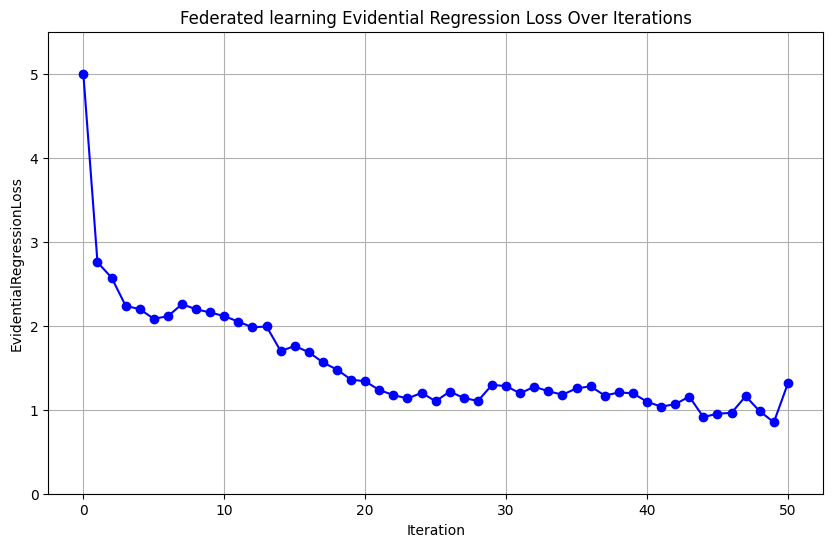

In [11]:
# Assuming 'server_mse' is a Pandas Series or a list containing the MSE values
server_mse = data['server_edl_loss']

# Create a new figure and axis
plt.figure(figsize=(10, 6))

# Plotting the MSE values
plt.plot(server_mse, marker='o', linestyle='-', color='b')  # 'o' is for circular markers

# Adding title and labels
plt.title('Federated learning Evidential Regression Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('EvidentialRegressionLoss')

# Optionally, you can add grid for better readability
plt.grid(True)
plt.ylim([0, 5.5])


# Show the plot
plt.show()


In [12]:
test_data = []

# Read in subset based on local_id
with open(f'clients_single_blade/test_data.json', 'r') as f:
        test_data = pd.read_json(f, orient='records', lines=True)

test_data

,x_values,x_wind_speed,y_ground_truth,observed_data,model,Wind Speed (m/s),Blade Length (m),Power Output (W),Power Output (kW),Power Output (MW)
0,0.035165,0.250000,0.558725,4.054399,4.573472,0.250000,64,0.0,0.0,0.0
1,0.035165,0.250000,0.558725,4.054399,4.573472,0.250000,75,0.0,0.0,0.0
2,0.035165,0.250000,0.558725,4.054399,4.573472,0.250000,79,0.0,0.0,0.0
3,0.035165,0.250000,0.558725,4.054399,4.573472,0.250000,91,0.0,0.0,0.0
4,0.234432,0.740672,0.891502,4.282732,2.930620,0.740672,64,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
16379,15.382662,32.657367,26.189045,80.196370,52.349112,32.657367,91,0.0,0.0,0.0
16380,15.796825,32.785541,26.880698,85.070610,56.641857,32.785541,64,0.0,0.0,0.0
16381,15.796825,32.785541,26.880698,85.070610,56.641857,32.785541,75,0.0,0.0,0.0
16382,15.796825,32.785541,26.880698,85.070610,56.641857,32.785541,79,0.0,0.0,0.0


In [13]:
# TOOooooOOOOOOOOOOOOOOOOOOOOOOO
##### load all data
train_dataset_client = []

# Read in subset based on local_id
for i in range(10):
    local_id = i
    with open(f'clients_single_blade/client_{local_id}.json', 'r') as f:
            train_dataset_client.append(pd.read_json(f, orient='records', lines=True))
    
print(len(train_dataset_client))


10


In [14]:
# Define global lists
wind_speeds = []
blade_lengths = []
power_outputs = []

# Iterate over each DataFrame in the list
for df in train_dataset_client:
    # Extract the columns and add them to the global lists
    wind_speeds.append(df['Wind Speed (m/s)'])
    blade_lengths.append(df['Blade Length (m)'])
    power_outputs.append(df['Power Output (MW)'])

combined_wind_speeds = pd.concat(wind_speeds, ignore_index=True)
combined_blade_lengths = pd.concat(blade_lengths, ignore_index=True)
combined_power_outputs = pd.concat(power_outputs, ignore_index=True)

In [15]:
model_mom = "experiments_wind/"

folder_name = "experiment_1" 
dir_name = "2023_11_27"

model_dir = model_mom + "%s/%s/" % (folder_name, dir_name)     


model_path = model_dir + "communication_round_%03d/" % (50) + "/aggregated_model.pt"
exist_model = tf.keras.models.load_model(model_path, custom_objects={'EvidentialRegressionLoss': EvidentialRegressionLoss})

df_blade_length_75 = test_data[test_data['Blade Length (m)'] == 75]
text_data_x_75 = df_blade_length_75[['Wind Speed (m/s)', 'Blade Length (m)']]
text_data_y_75 = df_blade_length_75['Power Output (MW)']



final_prediction = exist_model.predict(text_data_x_75.values)
# print(test_data_x.values)
# print(test_data_y.values)

#print(df_uncertainty)

128/128 [==============================] - 0s 286us/step


/var/folders/nx/b6bfmd5s0tngchr9m2kgpqf00000gn/T/ipykernel_38791/3859835947.py:49: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


AttributeError: 'Line2D' object has no attribute 'set_sizes'

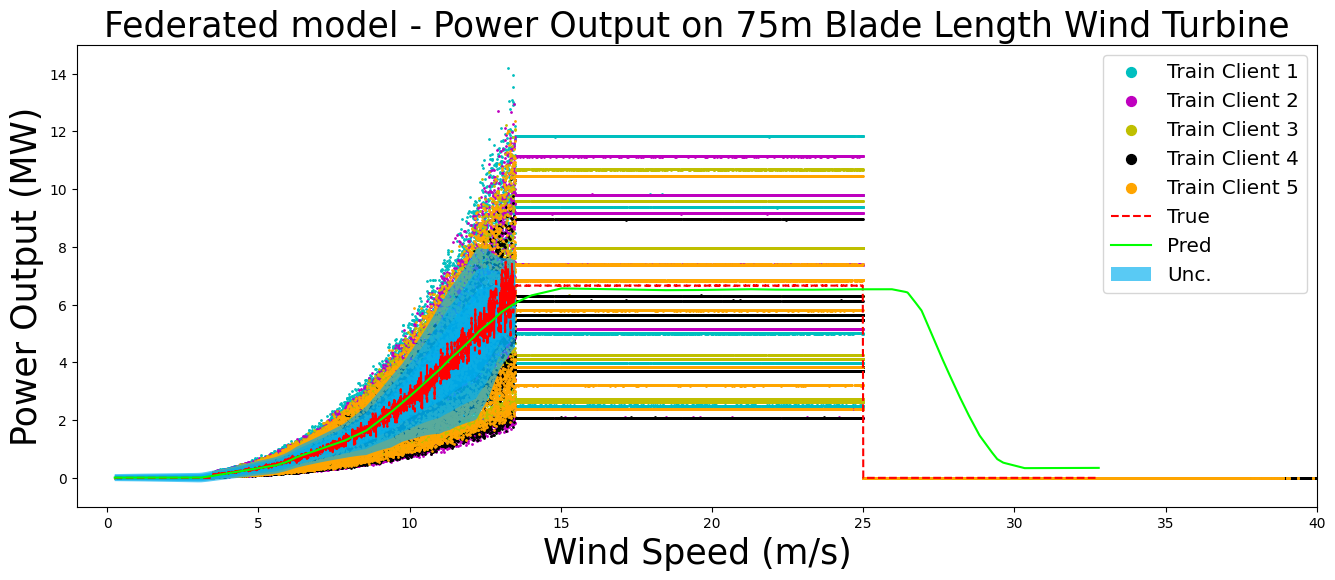

In [17]:
plot_predictions3(combined_wind_speeds.values, combined_power_outputs.values, text_data_x_75.values, text_data_y_75.values, final_prediction)


## centralized model

In [19]:
# Define global lists
wind_speeds = []
blade_lengths = []
power_outputs = []

# Iterate over each DataFrame in the list
for df in train_dataset_client:
    # Extract the columns and add them to the global lists
    wind_speeds.append(df['Wind Speed (m/s)'])
    blade_lengths.append(df['Blade Length (m)'])
    power_outputs.append(df['Power Output (MW)'])

combined_wind_speeds = pd.concat(wind_speeds, ignore_index=True)
combined_blade_lengths = pd.concat(blade_lengths, ignore_index=True)
combined_power_outputs = pd.concat(power_outputs, ignore_index=True)
x_train_blade_length = pd.concat([combined_wind_speeds, combined_blade_lengths], axis=1)

In [20]:
def initial_model_tensorflow():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        edl.layers.DenseNormalGamma(1)
    ])
    return model

In [21]:
centralized_model = initial_model_tensorflow() 
if not centralized_model.built: 
        input_shape = (2,)
        if input_shape is None:
            raise ValueError("Input shape must be specified in 'conf' to build the model.")
        centralized_model.build((None,) + input_shape)


centralized_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(5e-4), 
                          loss=EvidentialRegressionLoss, 
                          metrics=[tf.keras.metrics.MeanSquaredError()])
model_trained = centralized_model.fit(x_train_blade_length.values, combined_power_outputs.values,  batch_size=1024, epochs=51, verbose=1)


Epoch 1/51
160/160 [==============================] - 0s 958us/step - loss: 2.2960 - mean_squared_error: 15.9736
Epoch 2/51
160/160 [==============================] - 0s 1ms/step - loss: 1.9304 - mean_squared_error: 15.0704
Epoch 3/51
160/160 [==============================] - 0s 1ms/step - loss: 1.8739 - mean_squared_error: 15.0947
Epoch 4/51
160/160 [==============================] - 0s 1ms/step - loss: 1.8312 - mean_squared_error: 15.0379
Epoch 5/51
160/160 [==============================] - 0s 984us/step - loss: 1.7839 - mean_squared_error: 14.9592
Epoch 6/51
160/160 [==============================] - 0s 1ms/step - loss: 1.7513 - mean_squared_error: 14.8685
Epoch 7/51
160/160 [==============================] - 0s 1ms/step - loss: 1.7048 - mean_squared_error: 14.7839
Epoch 8/51
160/160 [==============================] - 0s 1ms/step - loss: 1.6790 - mean_squared_error: 14.7374
Epoch 9/51
160/160 [==============================] - 0s 1ms/step - loss: 1.6584 - mean_squared_error: 14.71

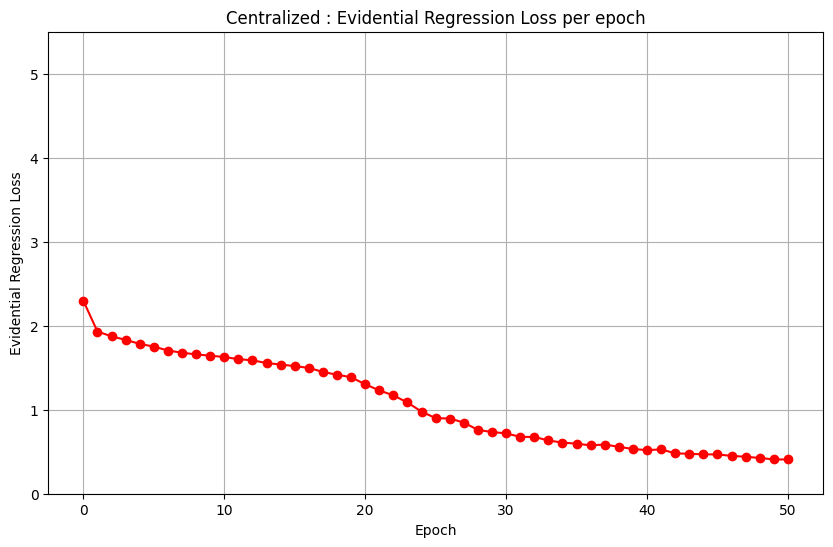

In [22]:
# Extract loss values
loss_values = model_trained.history['loss']

# Create a figure
plt.figure(figsize=(10, 6))
plt.grid(True)

# Plot for loss
plt.plot(loss_values, color='red', marker='o', linestyle='-', label='Loss')
plt.title('Centralized : Evidential Regression Loss per epoch')
plt.xlabel('Epoch')
plt.ylabel('Evidential Regression Loss')
plt.ylim([0, 5.5])

# Show the plot
plt.show()

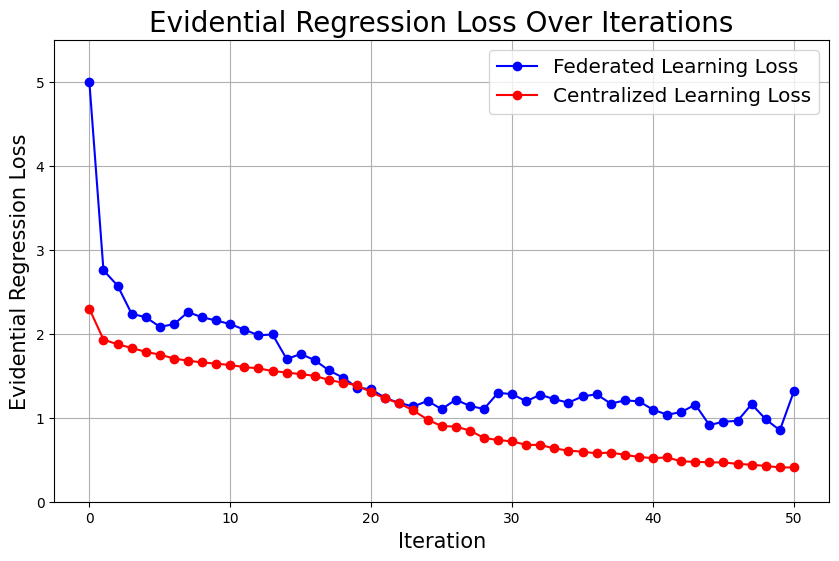

In [23]:
# Assuming 'server_mse' is a Pandas Series or a list containing the MSE values
server_mse = data['server_edl_loss']

# Extract loss values
loss_values = model_trained.history['loss']

# Create a new figure and axis
plt.figure(figsize=(10, 6))

# Plotting the server MSE values
plt.plot(server_mse, marker='o', linestyle='-', color='b', label='Federated Learning Loss')  # 'o' is for circular markers

# Plotting the loss values
plt.plot(loss_values, color='red', marker='o', linestyle='-', label='Centralized Learning Loss')

# Adding title and labels
plt.title('Evidential Regression Loss Over Iterations', fontsize=20)
plt.xlabel('Iteration', fontsize=15)
plt.ylabel('Evidential Regression Loss', fontsize=15)

# Optionally, you can add grid for better readability
plt.grid(True)
plt.ylim([0, 5.5])

# Add a legend
plt.legend(fontsize='x-large')

# Show the plot
plt.show()

In [24]:
df_blade_length_75 = test_data[test_data['Blade Length (m)'] == 75]

In [25]:
test_data_x = test_data[['Wind Speed (m/s)', 'Blade Length (m)']]
test_data_y = test_data['Power Output (MW)']
###
text_data_x_75 = df_blade_length_75[['Wind Speed (m/s)', 'Blade Length (m)']]
text_data_y_75 = df_blade_length_75['Power Output (MW)']

centralized_prediction = centralized_model.predict(text_data_x_75.values)

128/128 [==============================] - 0s 326us/step


/var/folders/nx/b6bfmd5s0tngchr9m2kgpqf00000gn/T/ipykernel_38791/3088907075.py:36: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


AttributeError: 'Line2D' object has no attribute 'set_sizes'

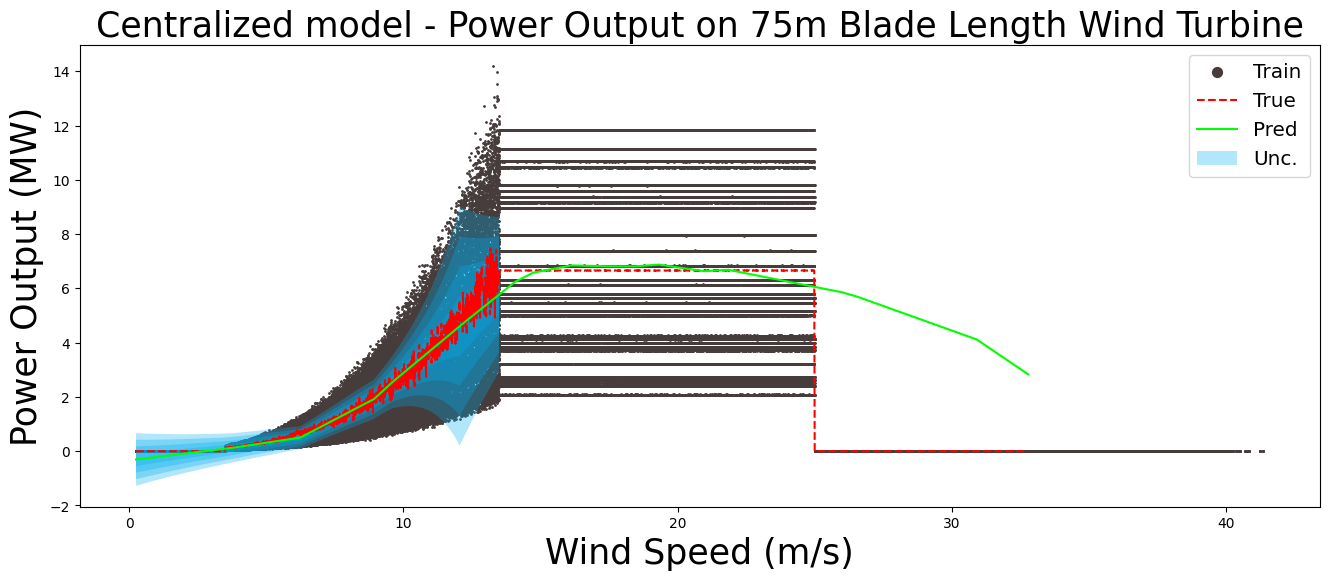

In [28]:
plot_predictions2(combined_wind_speeds.values, combined_power_outputs.values, text_data_x_75.values, text_data_y_75.values, centralized_prediction)

### Auxiliaries

In [3]:
def EvidentialRegressionLoss(true, pred):
    return edl.losses.EvidentialRegression(true, pred, coeff=1e-2)
def plot_predictions(x_train, y_train, x_test, y_test, y_pred, n_stds=4, kk=0):
    x_test = x_test[:, 0]
    mu, v, alpha, beta = tf.split(y_pred, 4, axis = 1) # Hyperparameters of evidential distributions
    mu = mu[:, 0]
    var = np.sqrt(beta / (v * (alpha - 1)))#variance of the evidential distribution ; Students-t distribution
    var = np.minimum(var, 1e3)[:, 0] # clip variance for plotting
    # # Set uncertainty to 0 for x_test values above 13.5
    # mask = x_test > 13.5
    # var[mask] = 0
    
    plt.figure(figsize=(16, 6), dpi=100)
    plt.scatter(x_train, y_train, s=1., c='#463c3c', zorder=0, label="Train")
    plt.plot(x_test, y_test, 'r--', zorder=2, label="True")
    plt.plot(x_test, mu, color='#007cab', zorder=3, label="Pred") # prediction line
    # Uncertainty epistemic   
    for k in np.linspace(0, n_stds+1, 4+1):
        plt.fill_between(
            x_test, (mu - k * var), (mu + k * var),
            alpha=0.3,
            edgecolor=None,
            facecolor='#00aeef',
            linewidth=0,
            zorder=1,
            label="Unc." if k == 0 else None)
        
    plt.gca().set_ylim(-8, 22)
    plt.gca().set_xlim(-2, 50)
    plt.legend(loc="upper left")
    plt.show()
def get_uncertainty_estimation(predictions, x_test):
    x_test = x_test.reshape(-1,)    
    # extract parameters from NIG (normal inverse-gamma)
    mu, v, alpha, beta = tf.split(predictions, 4, axis=1)
    mu = mu[:, 0]
    aleatoric_uncertainty = (beta / (alpha - 1))
    epistemic_uncertainty = (beta / (v * (alpha - 1)))
    total_evidence = 2*v + alpha

    # 
    df_uncertainty = pd.DataFrame({
        "beta": beta [:, 0], # scale parameters, influences the scale/spread
        "alpha": alpha [:, 0], # determines how the probability density of the IG distr. is shaped -> part of the prior distribution over variance of normal dist.
        "v": v[:, 0], # degrees of freedom -> amount of data or information that have informed this prediction
        "Aleatoric": aleatoric_uncertainty[:, 0],  # data uncertainty
        "Epistemic": epistemic_uncertainty[:, 0],  # model uncertainty due to lack of knowledge
        "total evidence" : total_evidence [:, 0], # overal strength / relability of prediction 
        "mu/prediction " : mu # mean of the normal distribution / PREDICTION
    }, index=x_test)

    df_uncertainty.index.name = 'x Test data point'

    return df_uncertainty

In [8]:
load_model = fl_utils.initial_model_tensorflow()
        
if not load_model.built:
    input_shape = (1,)
    if input_shape is None:
        raise ValueError("Input shape must be specified in 'conf' to build the model.")
    load_model.build((None,) + input_shape)


print(load_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_normal_gamma (DenseN  (None, 4)                 260       
 ormalGamma)                                                     
                                                                 
Total params: 4548 (17.77 KB)
Trainable params: 4548 (17.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [16]:
import matplotlib.pyplot as plt

def plot_predictions3(x_train, y_train, x_test, y_test, y_pred, n_stds=4, kk=0):
    mu, v, alpha, beta = tf.split(y_pred, 4, axis = 1) # Hyperparameters of evidential distributions
    mu = mu[:, 0]
    var = np.sqrt(beta / (v * (alpha - 1)))#variance of the evidential distribution ; Students-t distribution
    var = np.minimum(var, 1e3)[:, 0] # clip variance for plotting

    # Select only the wind speed column from x_test
    x_test_wind_speed = x_test[:, 0]

    # Set uncertainty to 0 for x_test_wind_speed values above 13.5
    mask = x_test_wind_speed > 13.5
    var[mask] = 0
    plt.figure(figsize=(16, 6), dpi=100)

    client_num = 0
    # Create a list of colors for the plot
    colors = ['c', 'm', 'y', 'k', 'orange', 'purple', 'brown']    # Plot each client's data in a different color
    for i in range(0, len(x_train), (4096*8)):
        client_index = i // 4096*8
        client_num += 1
        plt.scatter(x_train[i:i+4096*8], y_train[i:i+4096*8], s=1., c=colors[client_index % len(colors)], zorder=0, label=f"Train Client {client_num}")

    plt.plot(x_test_wind_speed, y_test, 'r--', zorder=2, label="True")
    plt.plot(x_test_wind_speed, mu, color='lime', zorder=3, label="Pred") # prediction line

    # Uncertainty epistemic   
    for k in np.linspace(0, n_stds+1, 4+1):
        plt.fill_between(
            x_test_wind_speed, (mu - k * var), (mu + k * var),
            alpha=0.65,
            edgecolor=None,
            facecolor='#00aeef',
            linewidth=0,
            zorder=1,
            label="Unc." if k == 0 else None)
        
    plt.gca().set_ylim(-1, 15)
    plt.gca().set_xlim(-1, 40)
    plt.legend(loc="upper left")
    plt.xlabel('Wind Speed (m/s)', fontsize=25)
    plt.ylabel('Power Output (MW)', fontsize=25)
    plt.title('Federated model - Power Output on 75m Blade Length Wind Turbine', fontsize=25)
    # Create the legend with larger font size
    legend = plt.legend(loc='upper right', fontsize='x-large')

    # Increase the size of the legend markers
    for handle in legend.legendHandles:
        handle.set_sizes([50])  # adjust as necessary

    plt.show()

def plot_predictions4(x_test, y_pred, n_stds=4):
    mu, v, alpha, beta = tf.split(y_pred, 4, axis = 1) # Hyperparameters of evidential distributions
    mu = mu[:, 0]
    var = np.sqrt(beta / (v * (alpha - 1)))#variance of the evidential distribution ; Students-t distribution
    var = np.minimum(var, 1e3)[:, 0] # clip variance for plotting

    # Select only the wind speed column from x_test
    x_test_wind_speed = x_test[:, 0]

    # Set uncertainty to 0 for x_test_wind_speed values above 13.5
    mask = x_test_wind_speed > 13.5
    var[mask] = 0

    plt.figure(figsize=(16, 6), dpi=100)

    # Uncertainty epistemic   
    for k in np.linspace(0, n_stds+1, 4+1):
        plt.fill_between(
            x_test_wind_speed, (mu - k * var), (mu + k * var),
            alpha=0.5,  # Increase alpha to make the fill less transparent
            edgecolor=None,
            facecolor='orange',  # Change facecolor to a more visible color
            linewidth=0,
            zorder=1,
            label="Unc." if k == 0 else None)

    plt.gca().set_ylim(-1, 15)
    plt.gca().set_xlim(-1, 30)
    plt.legend(loc="upper left")
    plt.show()

In [27]:
def plot_predictions2(x_train, y_train, x_test, y_test, y_pred, n_stds=4, kk=0):
    mu, v, alpha, beta = tf.split(y_pred, 4, axis = 1) # Hyperparameters of evidential distributions
    mu = mu[:, 0]
    var = np.sqrt(beta / (v * (alpha - 1)))#variance of the evidential distribution ; Students-t distribution
    var = np.minimum(var, 1e3)[:, 0] # clip variance for plotting

    # Select only the wind speed column from x_test
    x_test_wind_speed = x_test[:, 0]

    # Set uncertainty to 0 for x_test_wind_speed values above 13.5
    mask = x_test_wind_speed > 13.5
    var[mask] = 0

    plt.figure(figsize=(16, 6), dpi=100)
    plt.scatter(x_train, y_train, s=1., c='#463c3c', zorder=0, label="Train")
    plt.plot(x_test_wind_speed, y_test, 'r--', zorder=2, label="True")
    plt.plot(x_test_wind_speed, mu, color='lime', zorder=3, label="Pred")

    # Uncertainty epistemic   
    for k in np.linspace(0, n_stds+1, 4+1):
        plt.fill_between(
            x_test_wind_speed, (mu - k * var), (mu + k * var),
            alpha=0.3,
            edgecolor=None,
            facecolor='#00aeef',
            linewidth=0,
            zorder=1,
            label="Unc." if k == 0 else None)
    plt.xlabel('Wind Speed (m/s)', fontsize=25)
    plt.ylabel('Power Output (MW)', fontsize=25)
    plt.title('Centralized model - Power Output on 75m Blade Length Wind Turbine', fontsize=25)
    # Create the legend with larger font size
    legend = plt.legend(fontsize='x-large')

    # Increase the size of the legend markers
    for handle in legend.legendHandles:
        handle.set_sizes([50])  # adjust as necessary

    plt.gca().set_ylim(-1, 15)
    plt.gca().set_xlim(-1, 30)
    plt.legend(loc="upper left")
    plt.show()